In [9]:
# Data source: https://www.dukascopy.com/swiss/english/marketwatch/historical/
import numpy as np
import pandas as pd
%matplotlib inline

In [10]:
from pathlib import Path
csvpath = Path('../Resources/Merck LTPrices.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head(2)

,Close
Date,
2015-03-03,58.34
2015-03-04,57.88


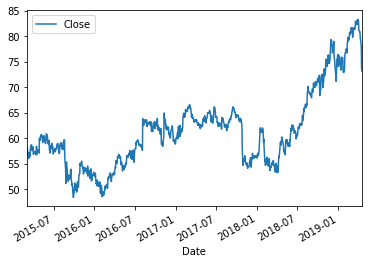

In [13]:
# Hourly EUR to USD exchange rates
df.plot()

In [14]:
# Hourly percentage changes in exchange rate (resampled to daily)
df['Return'] = df.pct_change() * 100 * 24
df = df.resample('D').mean()
df = df.dropna()
df.head()

,Close,Return
Date,,
2015-03-04,57.88,-18.923552
2015-03-05,57.98,4.146510
2015-03-06,56.84,-47.188686
2015-03-09,57.26,17.733990
2015-03-10,56.58,-28.501572


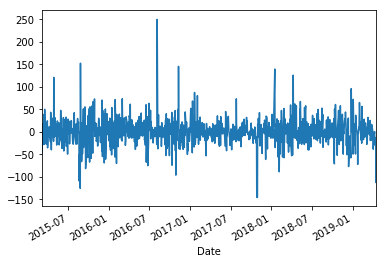

In [15]:
df.Return.plot()

# GARCH

In [16]:
import arch as arch
from arch import arch_model

In [21]:
# Create the GARCH model
# YOUR CODE HERE!
model = arch_model(df.Return, mean="Zero", vol="GARCH", p=1, q=1)
results = model.fit(disp="off")                   

In [22]:
# Output the model summary
# YOUR CODE HERE!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -4978.35
Distribution:                  Normal   AIC:                           9962.70
Method:            Maximum Likelihood   BIC:                           9977.55
                                        No. Observations:                 1040
Date:                Sat, May 09 2020   Df Residuals:                     1037
Time:                        17:54:44   Df Model:                            3
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega        466.3967    194.737      2.395  1.662e-02 [ 84.718,8.481e+02]
alpha[1]       0.2522  9.468e-02      2.664  7.726e-03 [6.664e-02,  0.438]
beta[1]        0.2542      0.182      1.394      0.163   [ -0.103,  0.612]
==========================================================================

Covariance estimator: robust
"""

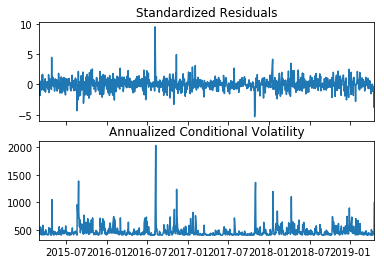

In [23]:
# Plot the model estimate of the annualized volatility
# YOUR CODE HERE!
fig = results.plot(annualize='D')

# Forecasting from GARCH

In [24]:
# Find the last day of the dataset
last_day = df.index.max().strftime('%Y-%m-%d')
last_day

'2019-04-18'

In [11]:
# Create a 5 day forecast of EUR to USD exchange rate volatility
# YOUR CODE HERE!

# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
# YOUR CODE HERE!

In [12]:
# Annualize the forecast
# YOUR CODE HERE!

,h.1,h.2,h.3,h.4,h.5
Gmt time,,,,,
2019-12-08,4.86332,4.877845,4.883856,4.894722,4.902688


# Visualizing the forecast

In [13]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Gmt time,2019-12-08
h.1,4.863320
h.2,4.877845
h.3,4.883856
h.4,4.894722
h.5,4.902688


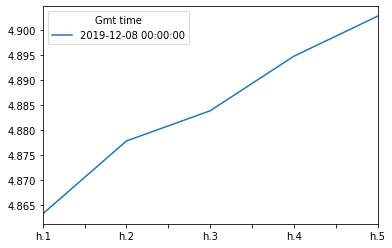

In [14]:
# Plot the final forecast
# YOUR CODE HERE!

Question: Is the exchange rate risk expected to increase or decrease over the next 5 days?

Answer: # YOUR ANSWER HERE!